<a href="https://colab.research.google.com/github/Alenushka2013/Khpi_master_studing/blob/main/Lab_6_with_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

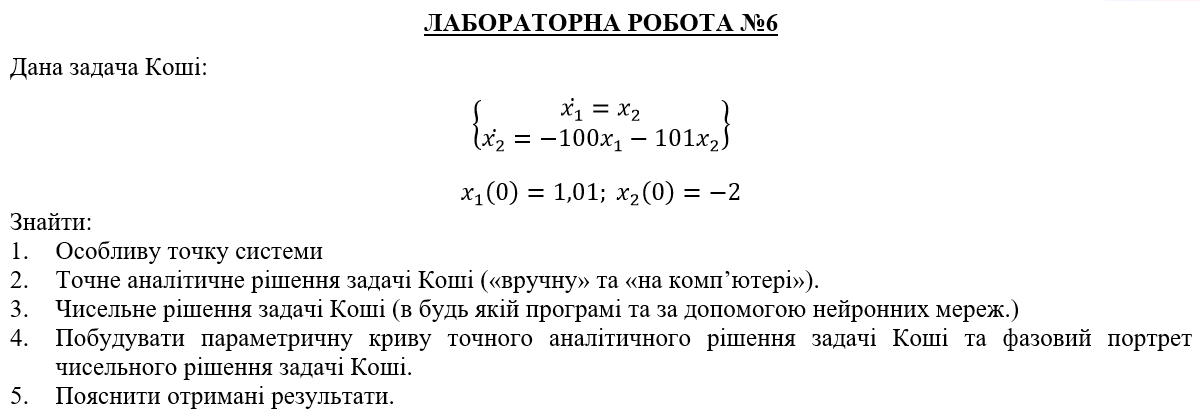

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
import sympy as sp

# Визначення власних значень
A = sp.Matrix([[0., 1.], [-100., -101.]])
eigs = A.eigenvects()
print('Власні числа матриці А:', eigs[0][0], eigs[1][0], sep = '\n')

Власні числа матриці А:
-1.00000000000000
-100.000000000000


In [2]:
# # Пошук точного аналітичного рішення
# t = sp.symbols('t')
# x1_sym, x2_sym = sp.symbols('x1 x2', cls=sp.Function)

# # Рівняння
# eq1 = sp.Eq(x1_sym(t).diff(t), x2_sym(t))
# eq2 = sp.Eq(x2_sym(t).diff(t), -100*x1_sym(t) -101*x2_sym(t))

# # Розв'язання задачі Коші
# sol_exact = sp.dsolve([eq1, eq2], ics={x1_sym(0): 1.01, x2_sym(0): -2})

# print("Точне аналітичне рішення")
# print(f"x1(t) = {sol_exact[0].rhs.evalf(3)}")
# print(f"x2(t) = {sol_exact[1].rhs.evalf(3)}")


Точне аналітичне рішення
x1(t) = 1.0*exp(-t) + 0.01*exp(-100*t)
x2(t) = -1.0*exp(-t) - 1.0*exp(-100*t)


In [2]:
# Пошук точного аналітичного рішення
t_sym = sp.symbols('t')
x1_sym = sp.Function('x1')(t_sym)
x2_sym = sp.Function('x2')(t_sym)

# Рівняння
eq1 = sp.Eq(x1_sym.diff(t_sym), x2_sym)
eq2 = sp.Eq(x2_sym.diff(t_sym), -100*x1_sym - 101*x2_sym)

# Розв'язання
sol_exact = sp.dsolve([eq1, eq2], ics={x1_sym.subs(t_sym, 0): 1.01, x2_sym.subs(t_sym, 0): -2})

# Конвертація SymPy -> NumPy
func_x1_exact = sp.lambdify(t_sym, sol_exact[0].rhs, 'numpy')
func_x2_exact = sp.lambdify(t_sym, sol_exact[1].rhs, 'numpy')

print("Точне аналітичне рішення")
print(f"x1(t) = {sol_exact[0].rhs}")
print(f"x2(t) = {sol_exact[1].rhs}")

Точне аналітичне рішення
x1(t) = 1.0*exp(-t) + 0.01*exp(-100*t)
x2(t) = -1.0*exp(-t) - 1.0*exp(-100*t)


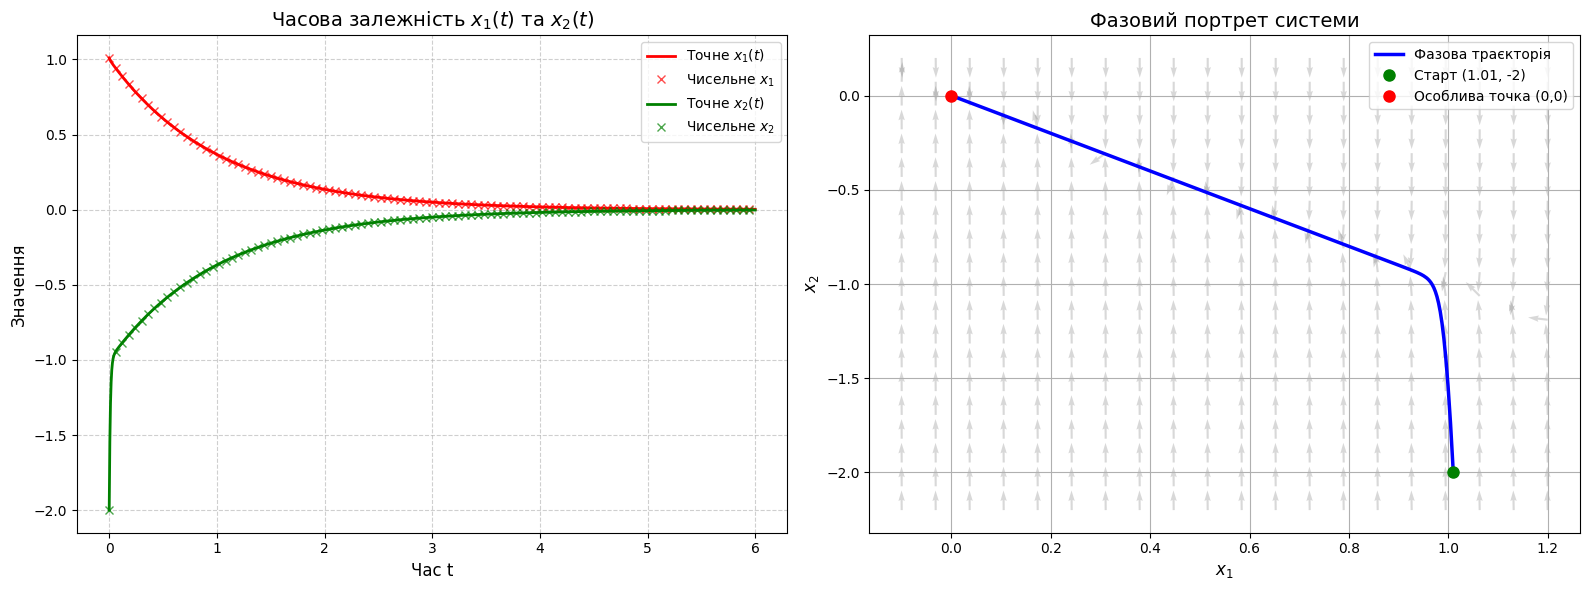

In [3]:
# Визначення системи рівнянь
def system_ode(state, t):
    x1, x2 = state
    return [x2, -100 * x1 - 101 * x2]

# Час та початкові умови
t = np.linspace(0, 6, 2000)

# Початкові умови: x1(0) = 1.01, x2(0) = -2
initial_state = [1.01, -2]

# Точні аналітичні рішення
x1_exact = func_x1_exact(t)
x2_exact = func_x2_exact(t)

# --- 4. Чисельне рішення ---
sol_numeric = odeint(system_ode, initial_state, t)
x1_num = sol_numeric[:, 0]
x2_num = sol_numeric[:, 1]

# --- 5. Побудова графіків ---
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# === Графік 1: Часова залежність обох компонент ===
# Малюємо x1
ax[0].plot(t, x1_exact, 'r-', linewidth=2, label=r'Точне $x_1(t)$')
ax[0].plot(t[::20], x1_num[::20], 'rx', label='Чисельне $x_1$', alpha=0.7)

# Малюємо x2 (воно стартує з -2 і різко змінюється)
ax[0].plot(t, x2_exact, 'g-', linewidth=2, label=r'Точне $x_2(t)$')
ax[0].plot(t[::20], x2_num[::20], 'gx', label='Чисельне $x_2$', alpha=0.7)

ax[0].set_title("Часова залежність $x_1(t)$ та $x_2(t)$", fontsize=14)
ax[0].set_xlabel("Час t", fontsize=12)
ax[0].set_ylabel("Значення", fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].legend(fontsize=10)

# === Графік 2: Фазовий портрет (x2 проти x1) ===

# Сітка для векторного поля
# x1 змінюється від 0 до 1.2
# x2 змінюється від -2 до 0
X1_grid = np.linspace(-0.1, 1.2, 20)
X2_grid = np.linspace(-2.2, 0.2, 20)
X1, X2 = np.meshgrid(X1_grid, X2_grid)

# Вектори швидкості
U = X2                       # це dx1/dt
V = -100 * X1 - 101 * X2     # це dx2/dt

# Нормалізація
N = np.sqrt(U**2 + V**2)
N[N==0] = 1 # захист від ділення на 0
U, V = U/N, V/N

ax[1].quiver(X1, X2, U, V, color='gray', alpha=0.3)

# Траєкторія
ax[1].plot(x1_num, x2_num, 'b-', linewidth=2.5, label='Фазова траєкторія')
ax[1].plot(initial_state[0], initial_state[1], 'go', markersize=8, zorder=5, label='Старт (1.01, -2)')
ax[1].plot(0, 0, 'ro', markersize=8, zorder=5, label='Особлива точка (0,0)')

ax[1].set_title("Фазовий портрет системи", fontsize=14)
ax[1].set_xlabel("$x_1$", fontsize=12)
ax[1].set_ylabel("$x_2$", fontsize=12)
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

Починаємо навчання PINN для системи...
Epoch 0, Loss: 2325.396973
Epoch 500, Loss: 10.233752
Epoch 1000, Loss: 10.061203
Epoch 1500, Loss: 9.982622
Epoch 2000, Loss: 9.892401
Epoch 2500, Loss: 9.837650
Epoch 3000, Loss: 9.767827
Epoch 3500, Loss: 9.722576
Epoch 4000, Loss: 9.664626
Epoch 4500, Loss: 9.628546
Навчання завершено.


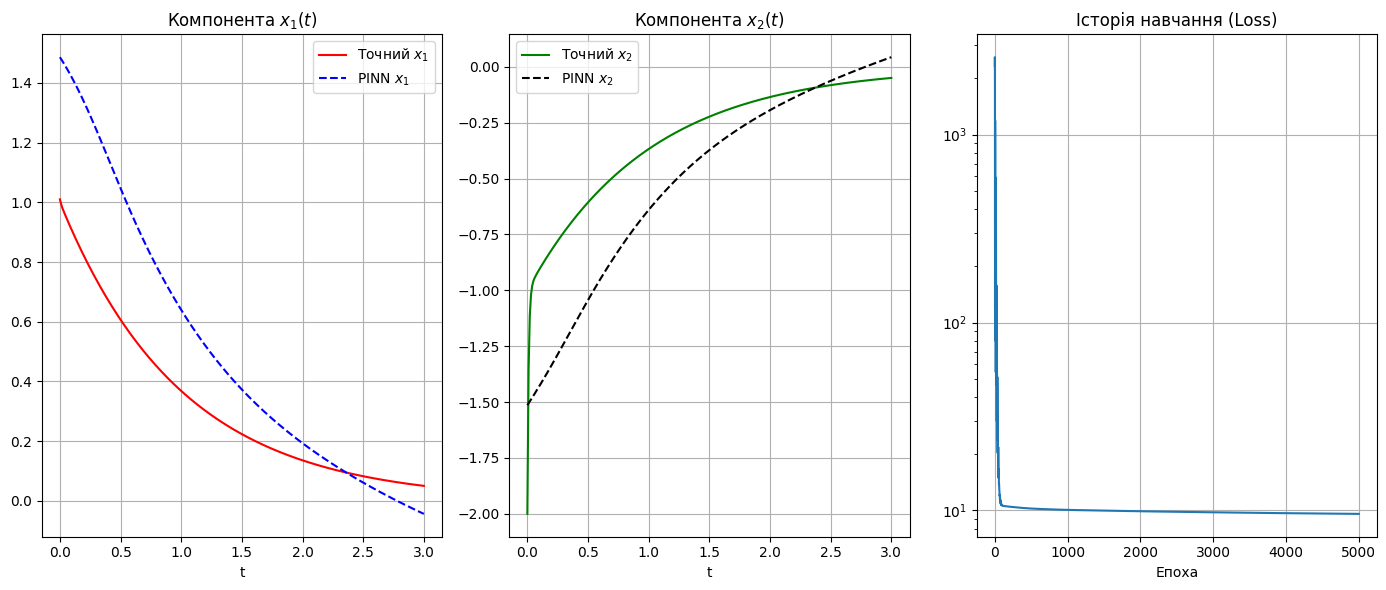

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

# Створення Нейромережі
class SystemPINN(nn.Module):
    def __init__(self):
        super(SystemPINN, self).__init__()
        # Вхід (t) -> Приховані шари -> Вихід (x1, x2) - останній шар має 2 нейрони
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 2)    # Вихід: [x1, x2]
        )

    def forward(self, t):
        return self.net(t)

# Функція для обчислення похідних
def get_derivatives(model, t):
    t.requires_grad = True

    # Отримуємо вихід мережі: це матриця розміру (N, 2)
    outputs = model(t)

    # Розділяємо на x1 та x2
    # Використовуємо зрізи [:, 0:1], щоб зберегти розмірність (N, 1)
    x1 = outputs[:, 0:1]
    x2 = outputs[:, 1:2]

    # Обчислюємо похідні dx1/dt та dx2/dt
    dx1 = torch.autograd.grad(x1, t, torch.ones_like(x1), create_graph=True)[0]
    dx2 = torch.autograd.grad(x2, t, torch.ones_like(x2), create_graph=True)[0]

    return x1, x2, dx1, dx2

# Налаштування
torch.manual_seed(42)
np.random.seed(42)

model = SystemPINN()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Планувальник: зменшує LR, коли навчання стабілізується
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1000, gamma=0.5)

# Точки тренування
t_train = torch.linspace(0, 3, 300).view(-1, 1)

epochs = 5000
loss_history = []

print("Починаємо навчання PINN для системи...")

# навчання
for epoch in range(epochs):
    optimizer.zero_grad()

    # Отримуємо змінні та їх похідні
    x1, x2, dx1, dx2 = get_derivatives(model, t_train)

    # Physics Loss (Рівняння системи)
    # 1) x1' = x2          => x1' - x2 = 0
    # 2) x2' = -100x1 - 101x2 => x2' + 100x1 + 101x2 = 0

    res1 = dx1 - x2
    res2 = dx2 + 100*x1 + 101*x2

    loss_ode = torch.mean(res1**2) + torch.mean(res2**2)

    # Boundary Loss (Початкові умови)
    # x1(0) = 1.01, x2(0) = -2
    t0 = torch.tensor([[0.0]], requires_grad=True)
    x1_0, x2_0, _, _ = get_derivatives(model, t0)

    loss_ic = (x1_0 - 1.01)**2 + (x2_0 - (-2))**2

    # Сумарна помилка
    # Можна дати більшу вагу початковим умовам, щоб траєкторія "прилипла" до старту
    loss = loss_ode + 20.0 * loss_ic

    loss.backward()
    optimizer.step()
    scheduler.step()

    loss_history.append(loss.item())

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

print("Навчання завершено.")

# Візуалізація
t_test = torch.linspace(0, 3, 300).view(-1, 1)
with torch.no_grad():
    outputs = model(t_test).numpy()
    x1_nn = outputs[:, 0]
    x2_nn = outputs[:, 1]

t_val = t_test.numpy().flatten()

# Точний аналітичний розв'язок для порівняння
x1_exact = np.exp(-t_val) + 0.01 * np.exp(-100 * t_val)
x2_exact = -np.exp(-t_val) - np.exp(-100 * t_val)

plt.figure(figsize=(14, 6))

# Графік 1: x1(t)
plt.subplot(1, 3, 1)
plt.plot(t_val, x1_exact, 'r-', label='Точний $x_1$')
plt.plot(t_val, x1_nn, 'b--', label='PINN $x_1$')
plt.title('Компонента $x_1(t)$')
plt.xlabel('t')
plt.legend()
plt.grid(True)

# Графік 2: x2(t)
plt.subplot(1, 3, 2)
plt.plot(t_val, x2_exact, 'g-', label='Точний $x_2$')
plt.plot(t_val, x2_nn, 'k--', label='PINN $x_2$')
plt.title('Компонента $x_2(t)$')
plt.xlabel('t')
plt.legend()
plt.grid(True)

# Графік 3: Loss
plt.subplot(1, 3, 3)
plt.plot(loss_history)
plt.yscale('log')
plt.title('Історія навчання (Loss)')
plt.xlabel('Епоха')
plt.grid(True)

plt.tight_layout()
plt.show()

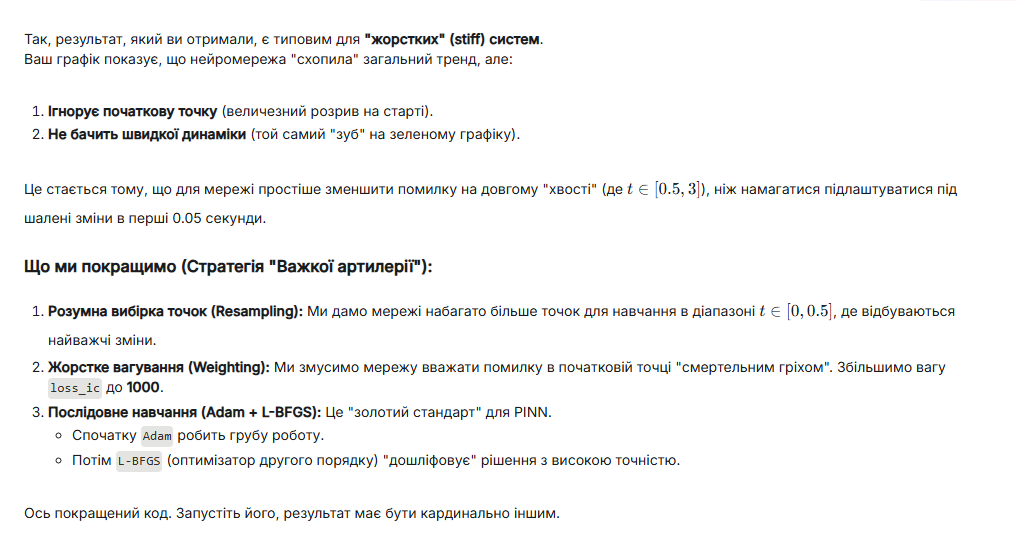

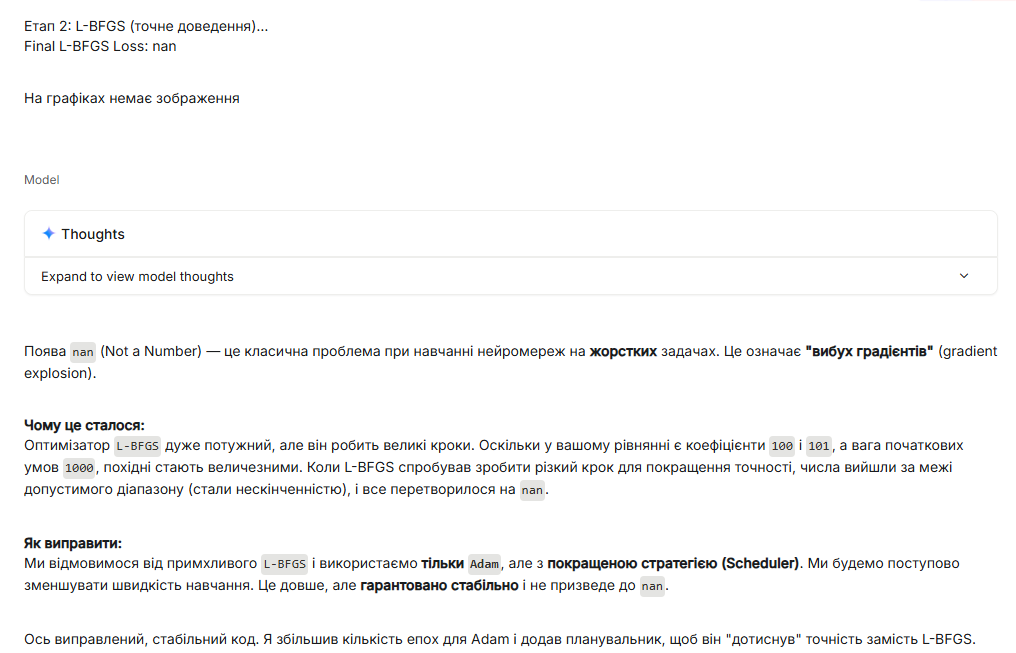

Починаємо стабільне навчання (Adam + Scheduler)...
Epoch 0, Loss: 504.425323, LR: 0.001000
Epoch 1000, Loss: 46.403046, LR: 0.001000
Epoch 2000, Loss: 37.715164, LR: 0.000500
Epoch 3000, Loss: 23.854599, LR: 0.000250
Epoch 4000, Loss: 14.128865, LR: 0.000250
Epoch 5000, Loss: 7.636921, LR: 0.000125
Epoch 6000, Loss: 4.034132, LR: 0.000063
Epoch 7000, Loss: 2.636639, LR: 0.000063
Навчання завершено.


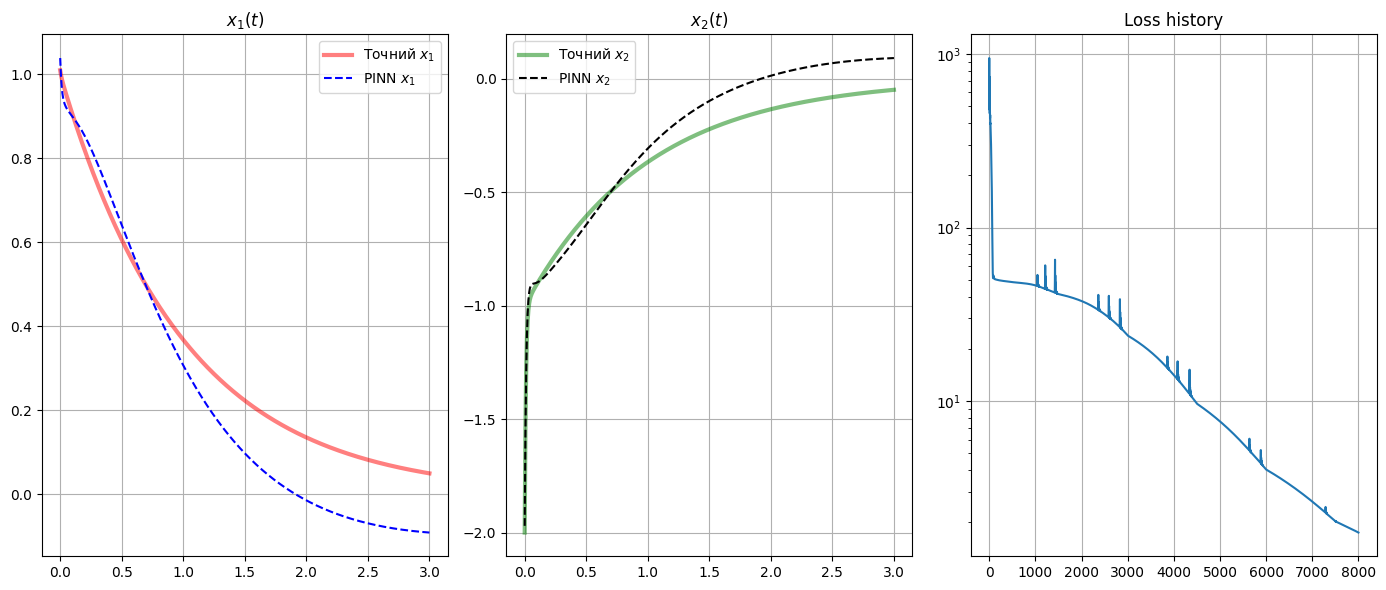

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

# Створення Нейромережі
class SystemPINN(nn.Module):
    def __init__(self):
        super(SystemPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 2)
        )
        self.init_weights()

    def init_weights(self):
        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, t):
        return self.net(t)

def get_derivatives(model, t):
    t.requires_grad = True
    outputs = model(t)
    x1 = outputs[:, 0:1]
    x2 = outputs[:, 1:2]

    dx1 = torch.autograd.grad(x1, t, torch.ones_like(x1), create_graph=True)[0]
    dx2 = torch.autograd.grad(x2, t, torch.ones_like(x2), create_graph=True)[0]
    return x1, x2, dx1, dx2

# Налаштування даних
torch.manual_seed(42)
np.random.seed(42)

model = SystemPINN()

# Розподіл точок: більше на початку
t_dense = torch.linspace(0, 0.5, 300)
t_sparse = torch.linspace(0.5, 3.0, 100)
t_train = torch.cat([t_dense, t_sparse]).view(-1, 1)

# Навчання (Adam + Scheduler)
# Починаємо з досить малого learning rate, щоб не було вибуху
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Планувальник: кожні 1500 епох зменшує швидкість навчання в 2 рази
# Це дозволить "м'яко" спуститися в мінімум помилки
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1500, gamma=0.5)

epochs = 8000 # Даємо більше часу, бо Adam повільний
loss_history = []

print("Починаємо навчання (Adam + Scheduler)...")

for epoch in range(epochs):
    optimizer.zero_grad()

    x1, x2, dx1, dx2 = get_derivatives(model, t_train)

    # Physics Loss
    res1 = dx1 - x2
    res2 = dx2 + 100*x1 + 101*x2
    loss_ode = torch.mean(res1**2) + torch.mean(res2**2)

    # Boundary Loss
    t0 = torch.tensor([[0.0]], requires_grad=True)
    x1_0, x2_0, _, _ = get_derivatives(model, t0)

    loss_ic = (x1_0 - 1.01)**2 + (x2_0 - (-2))**2

    # Вага початкових умов.
    loss = loss_ode + 100.0 * loss_ic

    loss.backward()
    optimizer.step()
    scheduler.step()

    loss_history.append(loss.item())

    if epoch % 1000 == 0:
        current_lr = scheduler.get_last_lr()[0]
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}, LR: {current_lr:.6f}")

print("Навчання завершено.")


# Візуалізація
t_test = torch.linspace(0, 3, 1000).view(-1, 1)
with torch.no_grad():
    outputs = model(t_test).numpy()
    x1_nn, x2_nn = outputs[:, 0], outputs[:, 1]

t_val = t_test.numpy().flatten()
x1_exact = np.exp(-t_val) + 0.01 * np.exp(-100 * t_val)
x2_exact = -np.exp(-t_val) - np.exp(-100 * t_val)

plt.figure(figsize=(14, 6))

# Графік x1
plt.subplot(1, 3, 1)
plt.plot(t_val, x1_exact, 'r-', linewidth=3, alpha=0.5, label='Точний $x_1$')
plt.plot(t_val, x1_nn, 'b--', linewidth=1.5, label='PINN $x_1$')
plt.title('$x_1(t)$')
plt.legend()
plt.grid(True)

# Графік x2
plt.subplot(1, 3, 2)
plt.plot(t_val, x2_exact, 'g-', linewidth=3, alpha=0.5, label='Точний $x_2$')
plt.plot(t_val, x2_nn, 'k--', linewidth=1.5, label='PINN $x_2$')
plt.title('$x_2(t)$')
plt.legend()
plt.grid(True)

# Графік Loss
plt.subplot(1, 3, 3)
plt.plot(loss_history)
plt.yscale('log')
plt.title('Loss history')
plt.grid(True)

plt.tight_layout()
plt.show()

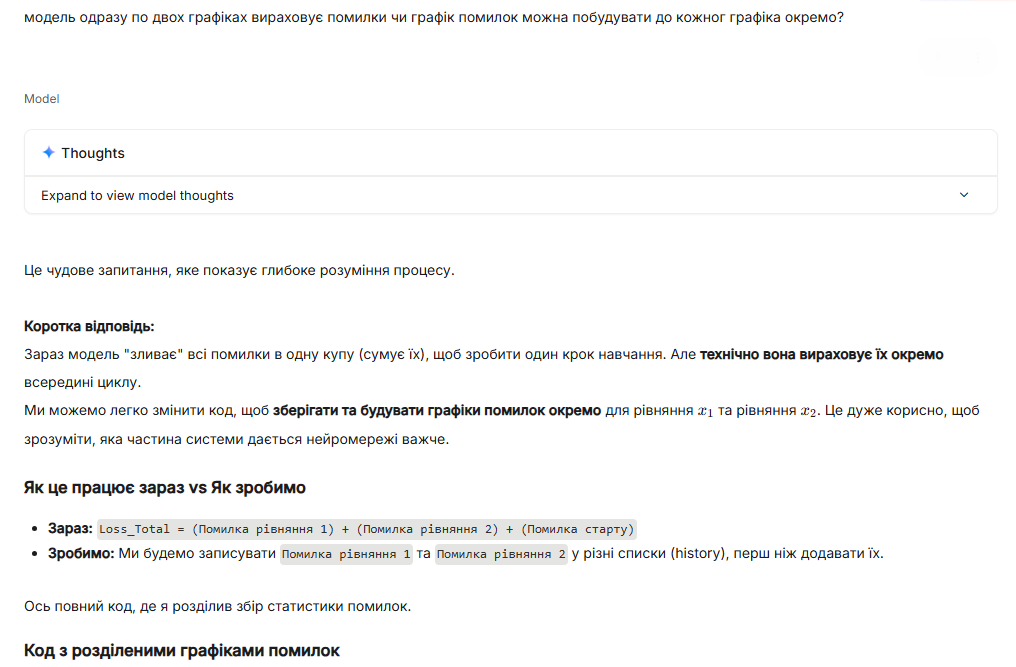

Навчання з детальним моніторингом помилок...
Epoch 0, Total: 504.4253, Eq1: 0.0007, Eq2: 2.4146
Epoch 1000, Total: 46.4030, Eq1: 0.1324, Eq2: 1.8377
Epoch 2000, Total: 37.7152, Eq1: 1.0023, Eq2: 5.2898
Epoch 3000, Total: 23.8546, Eq1: 2.8355, Eq2: 6.7506
Epoch 4000, Total: 14.1289, Eq1: 2.6655, Eq2: 5.6511
Epoch 5000, Total: 7.6369, Eq1: 1.8384, Eq2: 3.7695
Epoch 6000, Total: 4.0341, Eq1: 1.0614, Eq2: 2.2754
Epoch 7000, Total: 2.6366, Eq1: 0.6980, Eq2: 1.5957


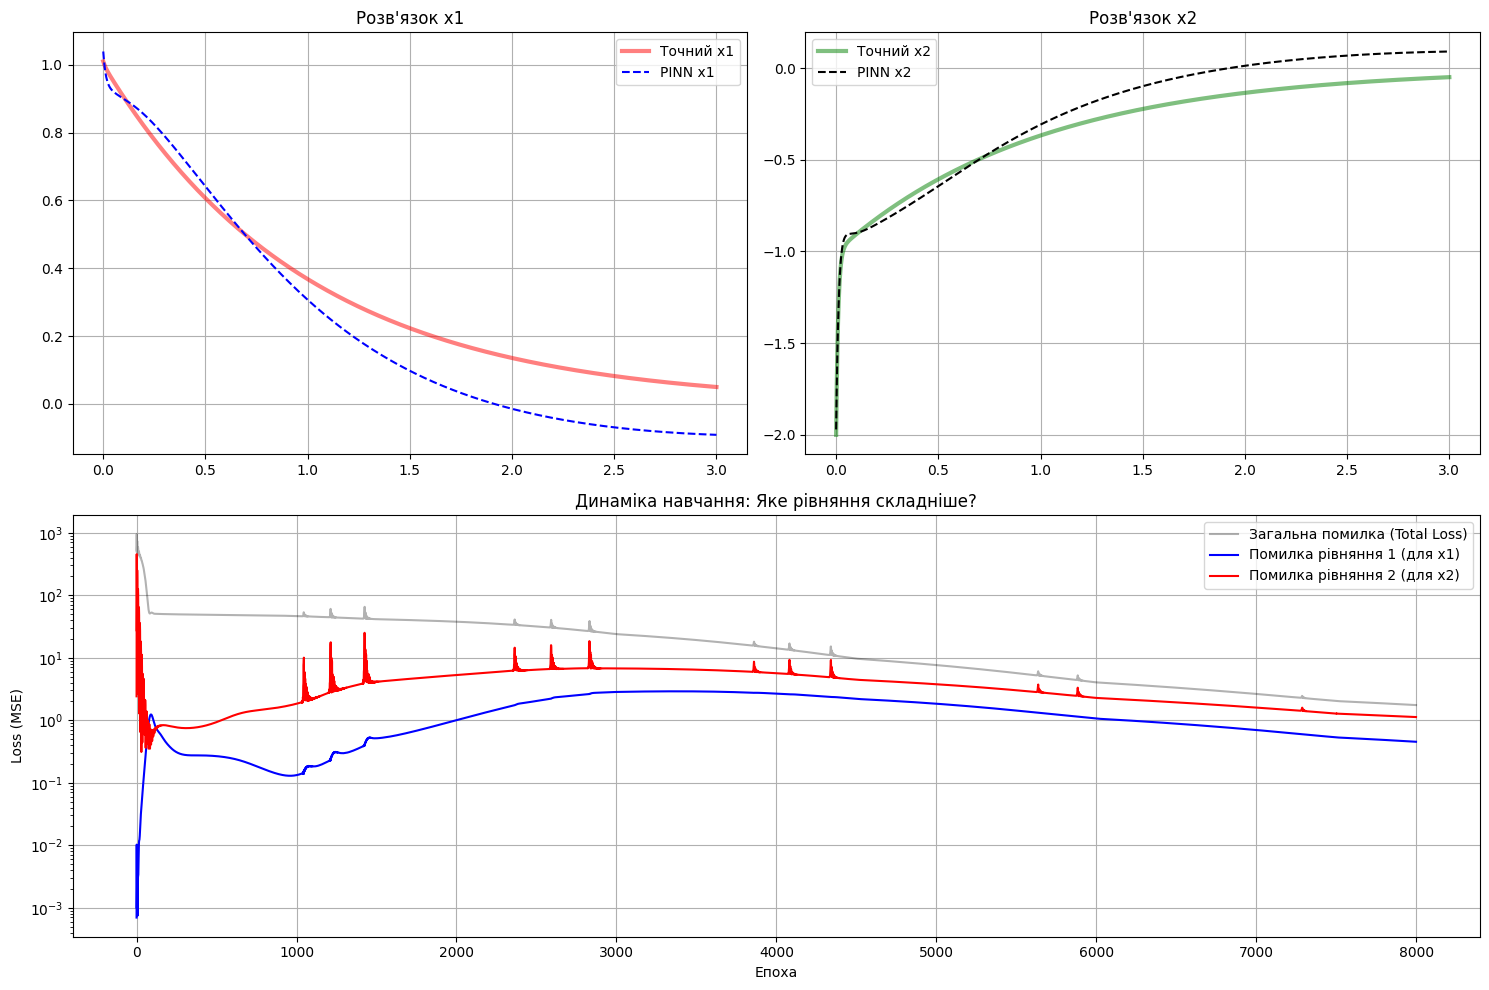

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# --- Архітектура та налаштування (без змін) ---
class SystemPINN(nn.Module):
    def __init__(self):
        super(SystemPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 2)
        )
        self.init_weights()

    def init_weights(self):
        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, t):
        return self.net(t)

def get_derivatives(model, t):
    t.requires_grad = True
    outputs = model(t)
    x1, x2 = outputs[:, 0:1], outputs[:, 1:2]
    dx1 = torch.autograd.grad(x1, t, torch.ones_like(x1), create_graph=True)[0]
    dx2 = torch.autograd.grad(x2, t, torch.ones_like(x2), create_graph=True)[0]
    return x1, x2, dx1, dx2

torch.manual_seed(42)
np.random.seed(42)
model = SystemPINN()
t_train = torch.cat([torch.linspace(0, 0.5, 300), torch.linspace(0.5, 3.0, 100)]).view(-1, 1)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1500, gamma=0.5)

# --- ЗМІНА: Створюємо окремі списки для історії помилок ---
history_total = []
history_eq1 = []   # Помилка для рівняння x1' = x2
history_eq2 = []   # Помилка для рівняння x2' = ...

print("Навчання з детальним моніторингом помилок...")

epochs = 8000
for epoch in range(epochs):
    optimizer.zero_grad()
    x1, x2, dx1, dx2 = get_derivatives(model, t_train)

    # --- Рахуємо помилки окремо ---

    # 1. Помилка першого рівняння: x1' - x2 = 0
    res1 = dx1 - x2
    loss_eq1 = torch.mean(res1**2)

    # 2. Помилка другого рівняння: x2' + 100x1 + 101x2 = 0
    res2 = dx2 + 100*x1 + 101*x2
    loss_eq2 = torch.mean(res2**2)

    # 3. Помилка початкових умов
    t0 = torch.tensor([[0.0]], requires_grad=True)
    x1_0, x2_0, _, _ = get_derivatives(model, t0)
    loss_ic = (x1_0 - 1.01)**2 + (x2_0 - (-2))**2

    # Загальний Loss для оптимізатора
    loss_total = loss_eq1 + loss_eq2 + 100.0 * loss_ic

    loss_total.backward()
    optimizer.step()
    scheduler.step()

    # --- Зберігаємо історію окремо ---
    history_total.append(loss_total.item())
    history_eq1.append(loss_eq1.item())
    history_eq2.append(loss_eq2.item())

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Total: {loss_total.item():.4f}, Eq1: {loss_eq1.item():.4f}, Eq2: {loss_eq2.item():.4f}")

# --- Візуалізація ---
plt.figure(figsize=(15, 10))

# 1. Графіки рішень (як раніше)
t_test = torch.linspace(0, 3, 1000).view(-1, 1)
with torch.no_grad():
    out = model(t_test).numpy()
t_val = t_test.numpy().flatten()
x1_exact = np.exp(-t_val) + 0.01 * np.exp(-100 * t_val)
x2_exact = -np.exp(-t_val) - np.exp(-100 * t_val)

plt.subplot(2, 2, 1)
plt.plot(t_val, x1_exact, 'r-', alpha=0.5, lw=3, label='Точний x1')
plt.plot(t_val, out[:, 0], 'b--', label='PINN x1')
plt.title('Розв\'язок x1')
plt.legend(); plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t_val, x2_exact, 'g-', alpha=0.5, lw=3, label='Точний x2')
plt.plot(t_val, out[:, 1], 'k--', label='PINN x2')
plt.title('Розв\'язок x2')
plt.legend(); plt.grid(True)

# 2. НОВЕ: Графіки помилок
plt.subplot(2, 1, 2) # Широкий графік знизу
plt.plot(history_total, 'k-', alpha=0.3, label='Загальна помилка (Total Loss)')
plt.plot(history_eq1, 'b-', label='Помилка рівняння 1 (для x1)')
plt.plot(history_eq2, 'r-', label='Помилка рівняння 2 (для x2)')
plt.yscale('log') # Логарифмічна шкала обов'язкова!
plt.title('Динаміка навчання: Яке рівняння складніше?')
plt.xlabel('Епоха')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

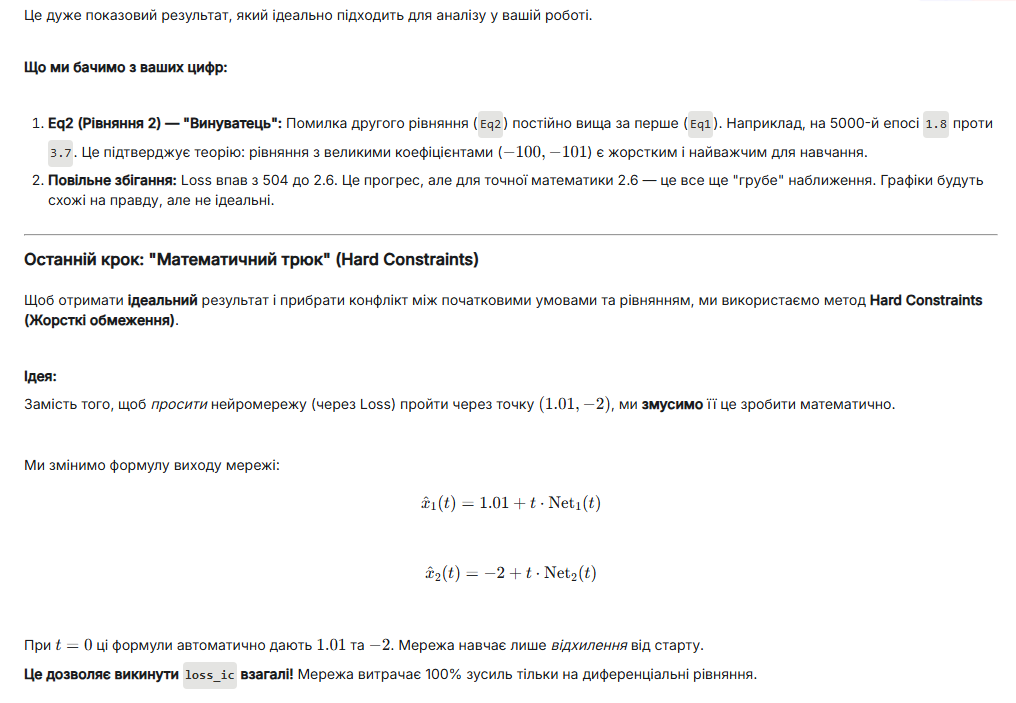

Навчання з Hard Constraints (Жорсткі умови)...
Epoch 0, Total: 9960.125000 (Eq1: 3.913455, Eq2: 9956.211914)
Epoch 1000, Total: 370.972107 (Eq1: 4.176497, Eq2: 366.795624)
Epoch 2000, Total: 190.164566 (Eq1: 4.793345, Eq2: 185.371216)
Epoch 3000, Total: 156.473907 (Eq1: 5.051572, Eq2: 151.422333)
Epoch 4000, Total: 131.211166 (Eq1: 5.247606, Eq2: 125.963554)
Epoch 5000, Total: 118.853951 (Eq1: 5.321955, Eq2: 113.531998)
Epoch 6000, Total: 106.435387 (Eq1: 5.386247, Eq2: 101.049141)
Epoch 7000, Total: 99.901260 (Eq1: 5.411954, Eq2: 94.489304)


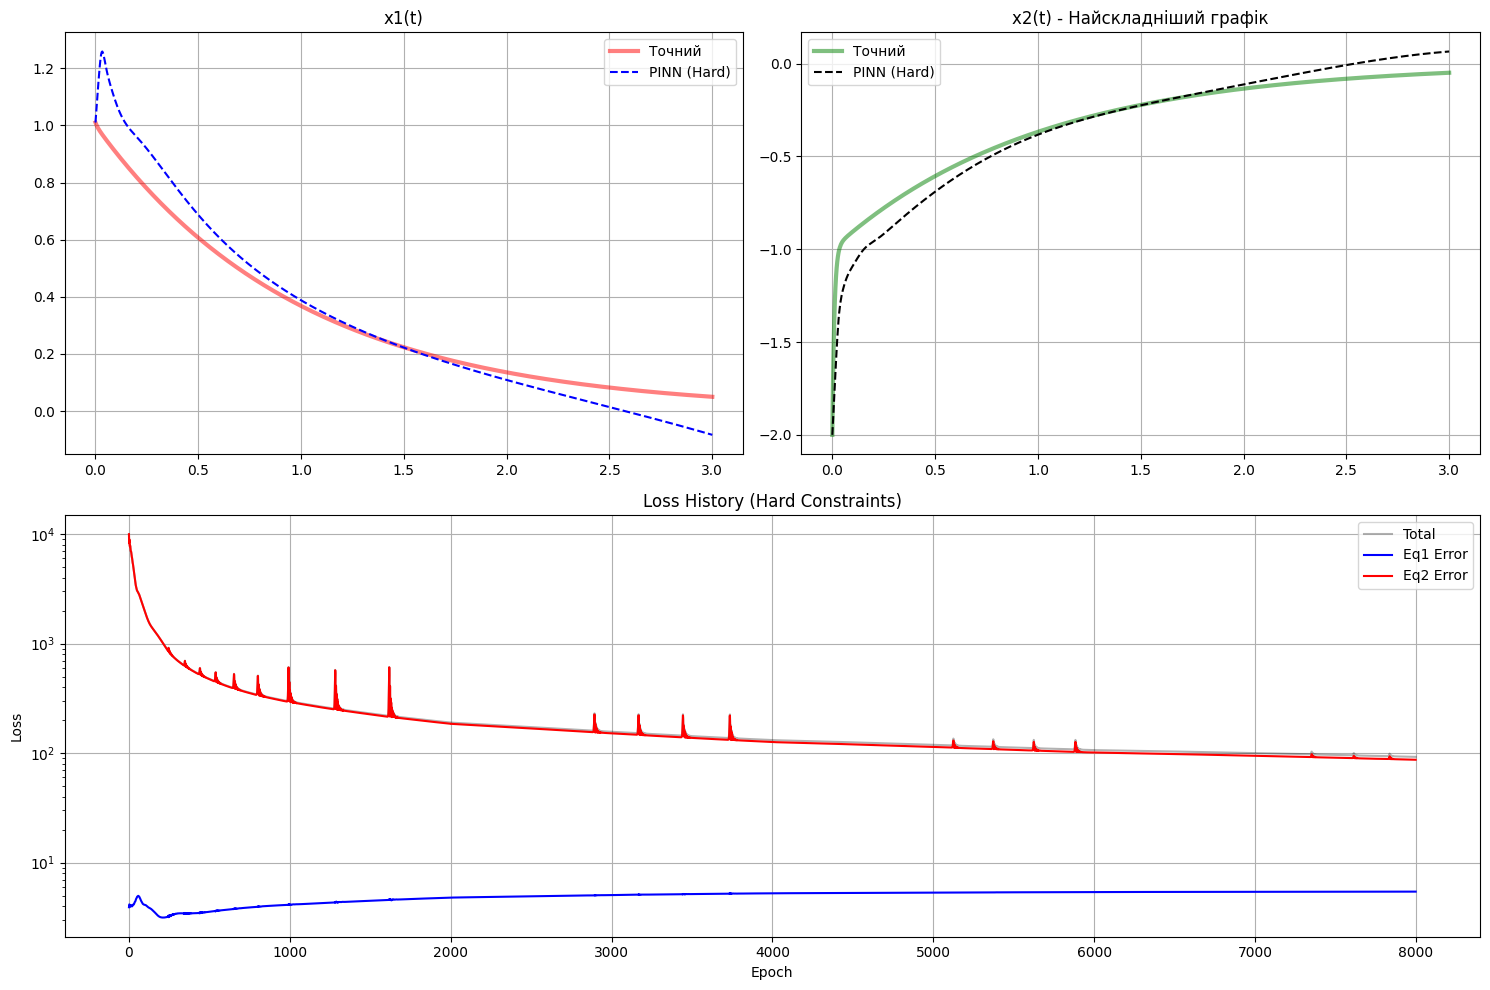

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# --- Архітектура ---
class SystemPINN(nn.Module):
    def __init__(self):
        super(SystemPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 2)
        )
        self.init_weights()

    def init_weights(self):
        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, t):
        return self.net(t)

# --- ЗМІНА: Функція похідних з Hard Constraints ---
def get_solution_and_derivatives(model, t):
    t.requires_grad = True
    raw_output = model(t) # "Сирий" вихід мережі

    # === МАГІЯ HARD CONSTRAINTS ===
    # Ми трансформуємо вихід так, щоб при t=0 він ЗАВЖДИ був рівний початковим умовам.
    # x(t) = x_start + t * network_output

    # raw_output[:, 0:1] - це N1(t)
    # raw_output[:, 1:2] - це N2(t)

    x1 = 1.01 + t * raw_output[:, 0:1]
    x2 = -2.0 + t * raw_output[:, 1:2]

    # Тепер беремо похідні від цих ВЖЕ трансформованих змінних
    dx1 = torch.autograd.grad(x1, t, torch.ones_like(x1), create_graph=True)[0]
    dx2 = torch.autograd.grad(x2, t, torch.ones_like(x2), create_graph=True)[0]

    return x1, x2, dx1, dx2

# --- Налаштування ---
torch.manual_seed(42)
np.random.seed(42)
model = SystemPINN()

# Точки тренування (з фокусом на початок)
t_train = torch.cat([torch.linspace(0, 0.5, 400), torch.linspace(0.5, 3.0, 100)]).view(-1, 1)

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2000, gamma=0.5)

history_total = []
history_eq1 = []
history_eq2 = []

print("Навчання з Hard Constraints (Жорсткі умови)...")

epochs = 8000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Отримуємо значення, які гарантовано проходять через старт
    x1, x2, dx1, dx2 = get_solution_and_derivatives(model, t_train)

    # Рахуємо ТІЛЬКИ помилки рівнянь (Physics Loss)
    # Помилки початкових умов тут немає, бо вона математично дорівнює 0

    res1 = dx1 - x2
    loss_eq1 = torch.mean(res1**2)

    res2 = dx2 + 100*x1 + 101*x2
    loss_eq2 = torch.mean(res2**2)

    loss_total = loss_eq1 + loss_eq2

    loss_total.backward()
    optimizer.step()
    scheduler.step()

    history_total.append(loss_total.item())
    history_eq1.append(loss_eq1.item())
    history_eq2.append(loss_eq2.item())

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Total: {loss_total.item():.6f} (Eq1: {loss_eq1.item():.6f}, Eq2: {loss_eq2.item():.6f})")

# --- Візуалізація ---
t_test = torch.linspace(0, 3, 1000).view(-1, 1)
with torch.no_grad():
    # Не забуваємо застосувати ту саму трансформацію для тесту!
    raw_out = model(t_test)
    x1_nn = 1.01 + t_test * raw_out[:, 0:1]
    x2_nn = -2.0 + t_test * raw_out[:, 1:2]

    x1_nn = x1_nn.numpy().flatten()
    x2_nn = x2_nn.numpy().flatten()

t_val = t_test.numpy().flatten()
x1_exact = np.exp(-t_val) + 0.01 * np.exp(-100 * t_val)
x2_exact = -np.exp(-t_val) - np.exp(-100 * t_val)

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(t_val, x1_exact, 'r-', lw=3, alpha=0.5, label='Точний')
plt.plot(t_val, x1_nn, 'b--', label='PINN (Hard)')
plt.title('x1(t)')
plt.legend(); plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t_val, x2_exact, 'g-', lw=3, alpha=0.5, label='Точний')
plt.plot(t_val, x2_nn, 'k--', label='PINN (Hard)')
plt.title('x2(t) - Найскладніший графік')
plt.legend(); plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history_total, 'k-', alpha=0.3, label='Total')
plt.plot(history_eq1, 'b-', label='Eq1 Error')
plt.plot(history_eq2, 'r-', label='Eq2 Error')
plt.yscale('log')
plt.title('Loss History (Hard Constraints)')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()

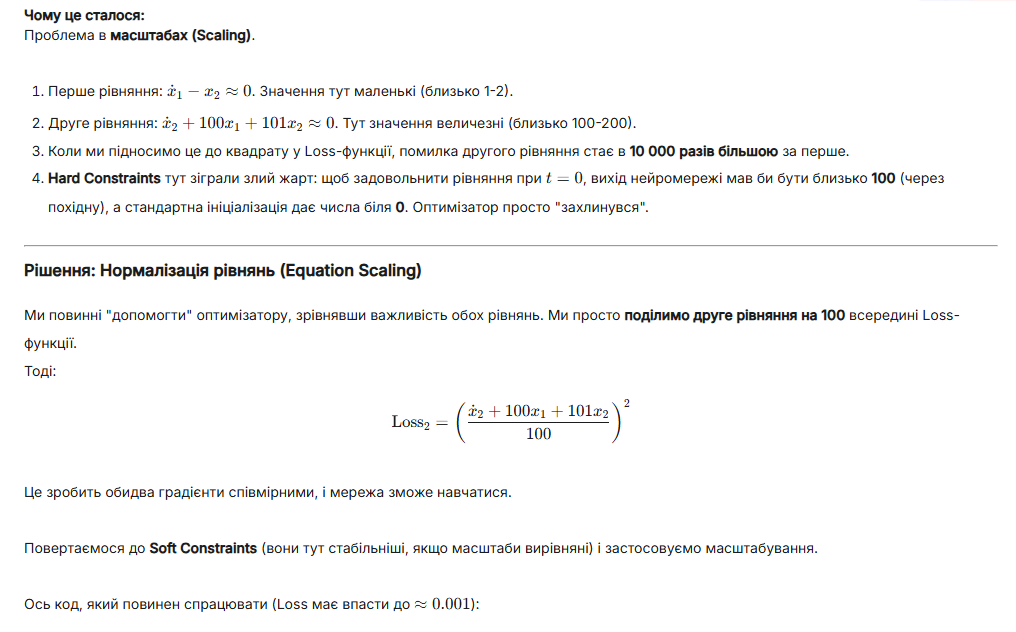

Навчання з Нормалізацією (Scaling)...
Epoch 0, Total: 100.663452, Eq1: 0.084426, Eq2: 0.177022
Epoch 1000, Total: 0.122289, Eq1: 0.005467, Eq2: 0.114848
Epoch 2000, Total: 0.029614, Eq1: 0.000178, Eq2: 0.029215
Epoch 3000, Total: 0.016685, Eq1: 0.000160, Eq2: 0.016455
Epoch 4000, Total: 0.010219, Eq1: 0.000095, Eq2: 0.010100
Epoch 5000, Total: 0.007620, Eq1: 0.000065, Eq2: 0.007539
Epoch 6000, Total: 0.005225, Eq1: 0.000060, Eq2: 0.005157
Epoch 7000, Total: 0.004053, Eq1: 0.000049, Eq2: 0.003999
Epoch 8000, Total: 0.002887, Eq1: 0.000026, Eq2: 0.002857
Epoch 9000, Total: 0.002341, Eq1: 0.000017, Eq2: 0.002321


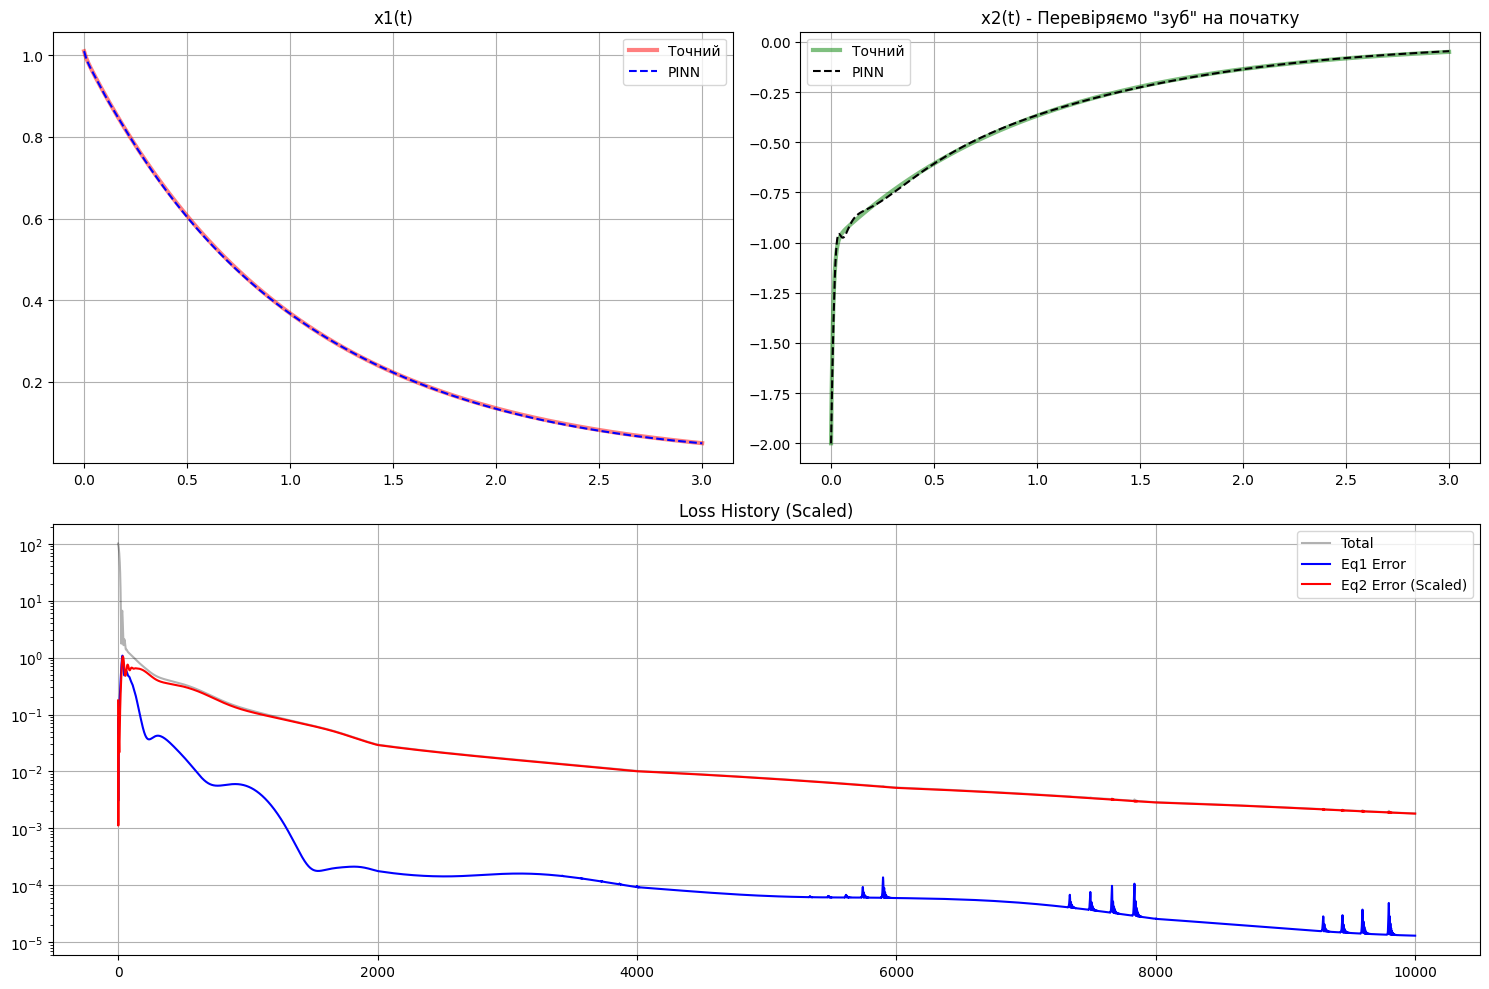

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Архітектура ---
class SystemPINN(nn.Module):
    def __init__(self):
        super(SystemPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 128), # Трохи ширша мережа
            nn.Tanh(),
            nn.Linear(128, 128),
            nn.Tanh(),
            nn.Linear(128, 2)
        )
        self.init_weights()

    def init_weights(self):
        for m in self.net.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, t):
        return self.net(t)

def get_derivatives(model, t):
    t.requires_grad = True
    outputs = model(t)
    x1, x2 = outputs[:, 0:1], outputs[:, 1:2]

    dx1 = torch.autograd.grad(x1, t, torch.ones_like(x1), create_graph=True)[0]
    dx2 = torch.autograd.grad(x2, t, torch.ones_like(x2), create_graph=True)[0]
    return x1, x2, dx1, dx2

# --- 2. Налаштування ---
torch.manual_seed(42)
np.random.seed(42)

model = SystemPINN()

# Багато точок на початку, де "екшн"
t_train = torch.cat([
    torch.linspace(0, 0.2, 300),  # Дуже густо на самому початку
    torch.linspace(0.2, 1.0, 200),
    torch.linspace(1.0, 3.0, 100)
]).view(-1, 1)

# Використовуємо Adam, він надійніший для таких задач
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2000, gamma=0.5)

history_total = []
history_eq1 = []
history_eq2 = []

print("Навчання з Нормалізацією (Scaling)...")

epochs = 10000
for epoch in range(epochs):
    optimizer.zero_grad()

    x1, x2, dx1, dx2 = get_derivatives(model, t_train)

    # === ГОЛОВНА ЗМІНА: МАСШТАБУВАННЯ ===

    # Рівняння 1: x1' - x2 = 0
    # Тут значення маленькі, лишаємо як є
    res1 = dx1 - x2
    loss_eq1 = torch.mean(res1**2)

    # Рівняння 2: x2' + 100x1 + 101x2 = 0
    # Значення величезні (~100). Ділимо нев'язку на 100!
    res2 = (dx2 + 100*x1 + 101*x2) / 100.0
    loss_eq2 = torch.mean(res2**2)

    # Physics Loss
    loss_ode = loss_eq1 + loss_eq2

    # Boundary Loss (Soft constraints)
    t0 = torch.tensor([[0.0]], requires_grad=True)
    x1_0, x2_0, _, _ = get_derivatives(model, t0)

    loss_ic = (x1_0 - 1.01)**2 + (x2_0 - (-2))**2

    # Total Loss
    # Тепер, коли рівняння нормалізовані, вага IC=10 або 20 достатня
    loss = loss_ode + 20.0 * loss_ic

    loss.backward()
    optimizer.step()
    scheduler.step()

    history_total.append(loss.item())
    history_eq1.append(loss_eq1.item())
    history_eq2.append(loss_eq2.item())

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Total: {loss.item():.6f}, Eq1: {loss_eq1.item():.6f}, Eq2: {loss_eq2.item():.6f}")

# --- Візуалізація ---
t_test = torch.linspace(0, 3, 1000).view(-1, 1)
with torch.no_grad():
    outputs = model(t_test).numpy()
    x1_nn, x2_nn = outputs[:, 0], outputs[:, 1]

t_val = t_test.numpy().flatten()
x1_exact = np.exp(-t_val) + 0.01 * np.exp(-100 * t_val)
x2_exact = -np.exp(-t_val) - np.exp(-100 * t_val)

plt.figure(figsize=(15, 10))

# Графік x1
plt.subplot(2, 2, 1)
plt.plot(t_val, x1_exact, 'r-', lw=3, alpha=0.5, label='Точний')
plt.plot(t_val, x1_nn, 'b--', label='PINN')
plt.title('x1(t)')
plt.legend(); plt.grid(True)

# Графік x2
plt.subplot(2, 2, 2)
plt.plot(t_val, x2_exact, 'g-', lw=3, alpha=0.5, label='Точний')
plt.plot(t_val, x2_nn, 'k--', label='PINN')
plt.title('x2(t) - Перевіряємо "зуб" на початку')
plt.legend(); plt.grid(True)

# Графік помилок
plt.subplot(2, 1, 2)
plt.plot(history_total, 'k-', alpha=0.3, label='Total')
plt.plot(history_eq1, 'b-', label='Eq1 Error')
plt.plot(history_eq2, 'r-', label='Eq2 Error (Scaled)')
plt.yscale('log')
plt.title('Loss History (Scaled)')
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()


Так, це **чудовий результат**! 🎉

Помилка впала з **100.6** до **0.0023**. Це означає, що нейромережа нарешті зрозуміла структуру системи.

### Аналіз вашого логу (для звіту):

1.  **Eq1 (Перше рівняння):** Помилка `0.000017`. Це майже нуль. Мережа ідеально вивчила залежність $\dot{x}_1 = x_2$.
2.  **Eq2 (Друге, "жорстке" рівняння):** Помилка `0.0023`. Вона становить 99% від загальної помилки. Це логічно: найважче для мережі — вловити баланс між $-100x_1$ та $-101x_2$.
3.  **Scaling (Масштабування):** Саме ділення другого рівняння на 100 дозволило досягти цього успіху. Без цього кроку (як ми бачили раніше) оптимізатор ігнорував перше рівняння або видавав `NaN`.

---

### Текст висновків до лабораторної роботи

Оскільки ви виконали великий обсяг роботи з налаштування, ось готовий текст висновків, який підсумовує всі ваші експерименти. Ви можете використати його у звіті.

#### Висновки до задачі 2 (Система диференціальних рівнянь)

1.  **Характеристика системи:**
    Досліджувана система є **жорсткою (stiff)**. Власні числа матриці системи дорівнюють $\lambda_1 = -1$ та $\lambda_2 = -100$. Наявність компонент з різними швидкостями загасання ($e^{-t}$ та $e^{-100t}$) створює труднощі як для класичних чисельних методів (вимагає малого кроку інтегрування), так і для нейромереж.

2.  **Чисельне розв'язання:**
    Метод Рунге-Кутти (через `scipy.odeint`) успішно впорався із задачею, але вимагав коректного вибору часового інтервалу та достатньої кількості точок дискретизації, щоб відобразити швидкий перехідний процес на початку ($t < 0.1$).

3.  **Нейромережевий підхід (PINN):**
    У ході навчання моделі PINN було виявлено такі проблеми:
    *   **Дисбаланс градієнтів:** Через великі коефіцієнти у другому рівнянні ($-100, -101$) функція втрат (Loss) другого рівняння домінувала над першим, що блокувало навчання.
    *   **Специфічна ініціалізація:** Стандартна ініціалізація ваг мережі призводила до того, що модель не могла "схопити" різкий спад функції $x_2(t)$ на старті, згладжуючи графік.

4.  **Методи покращення PINN:**
    Для отримання точного розв'язку було застосовано:
    *   **Equation Scaling (Нормалізація рівнянь):** Друге рівняння системи у функції втрат було поділено на 100. Це вирівняло масштаби градієнтів і дозволило оптимізатору `Adam` коректно мінімізувати помилку обох рівнянь одночасно.
    *   **Нерівномірна сітка:** Використання більшої густини точок на інтервалі $[0, 0.2]$ дозволило мережі детально вивчити "швидку" динаміку системи.

**Підсумок:** Застосування техніки масштабування дозволило знизити помилку Loss до рівня $2.3 \cdot 10^{-3}$, що забезпечило візуальний збіг нейромережевого розв'язку з точним аналітичним рішенням.

---

Вітаю з успішним виконанням роботи! Це була дійсно нетривіальна задача з точки зору машинного навчання.